<a href="https://colab.research.google.com/github/Elizajr/CursoMetodosComputacionales/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mapa Logístico**

In [1]:
#la función es
r=1
xn=0.5
for n in range(0,10):
  xn=r*xn*(1-xn)
  print(xn)

0.25
0.1875
0.15234375
0.1291351318359375
0.11245924956165254
0.09981216674968249
0.08984969811841606
0.08177672986644556
0.07508929631879595
0.06945089389714401


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def logist_map(n,r,xn):
  for i in range(0,n):
    xn=r*xn*(1-xn)
  return xn


In [4]:
N=np.linspace(0,50,51)
Y=np.zeros(len(N))
#plt.figure()
for n in N:
  n=int(n)
  Y[n]= logist_map(n,r,xn)


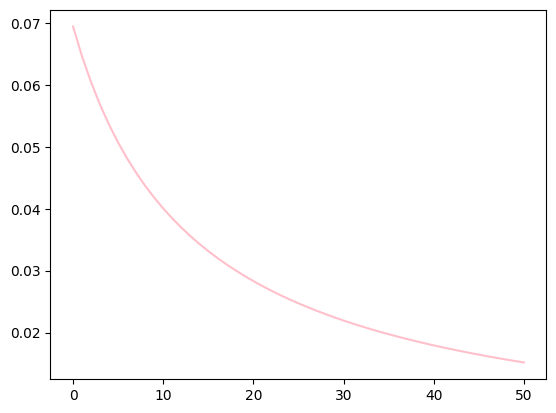

In [5]:
plt.figure()
plt.plot(N,Y,color="pink")


In [6]:
def grafica(r,xn, color):
  N=np.linspace(0,15,16)
  Y=np.zeros(len(N))
  for n in N:
    n=int(n)
    Y[n]= logist_map(n,r,xn)
  fig,ax=plt.subplots()
  ax.plot(N,Y, f"{color}")
  ax.set_xlabel("n")
  ax.set_ylabel("Población")


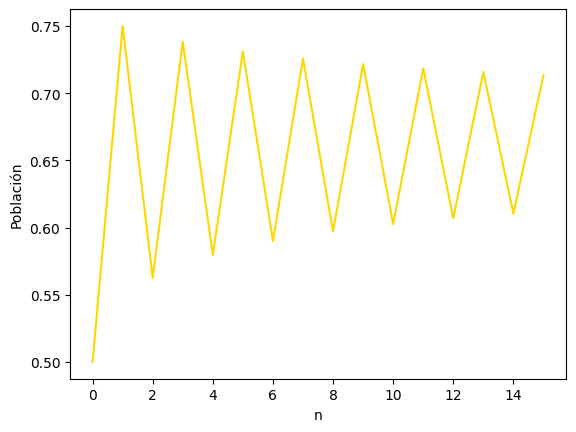

In [7]:

grafica(3,0.5,color="gold")

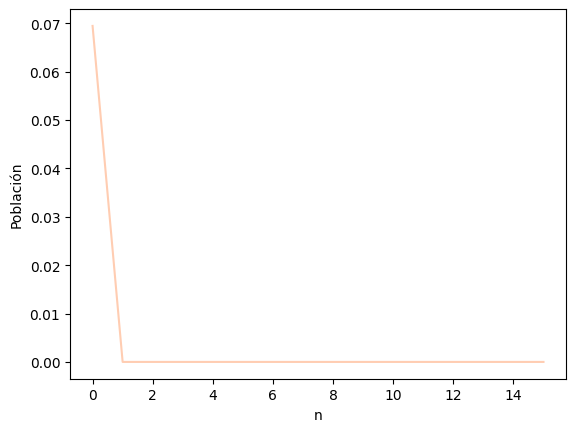

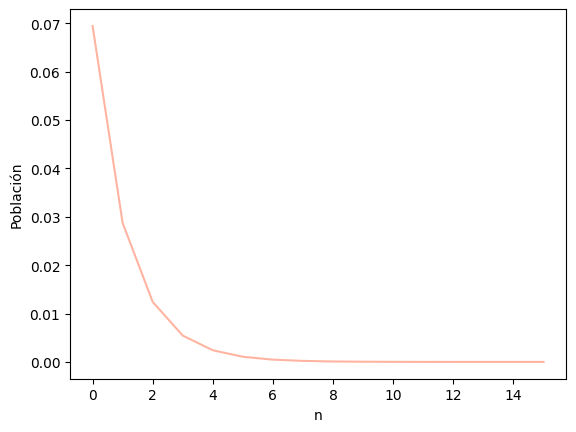

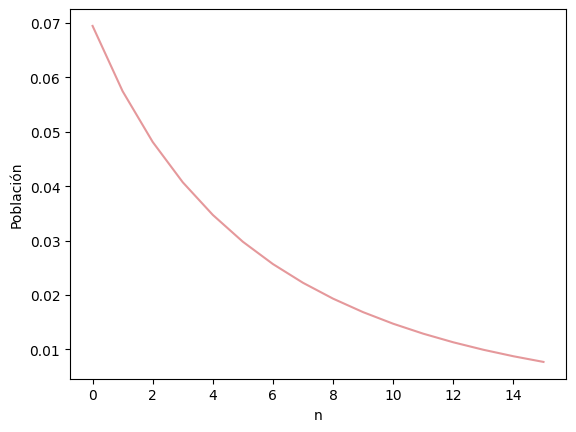

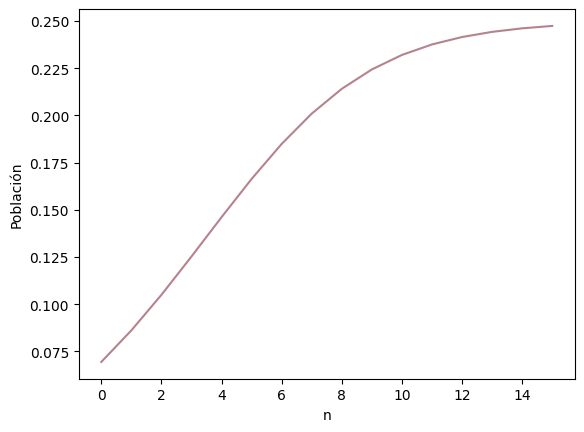

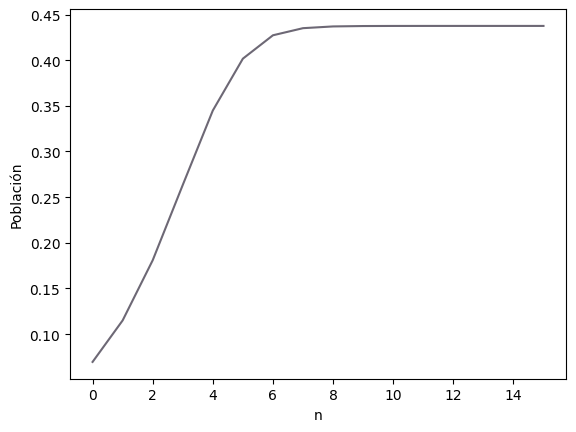

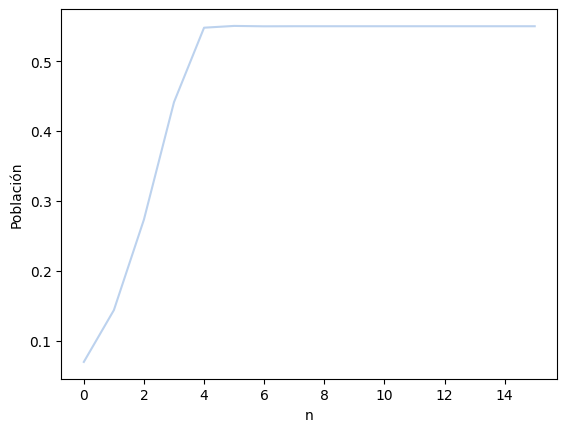

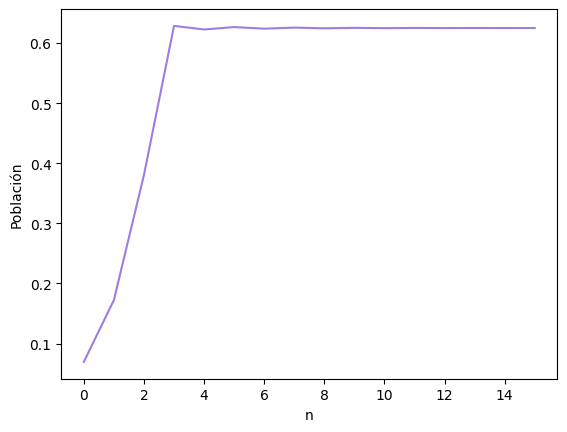

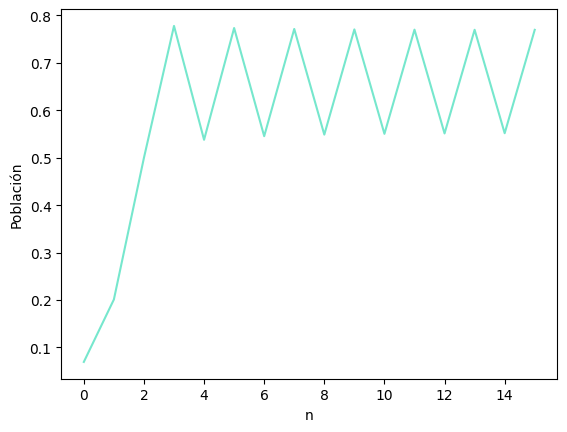

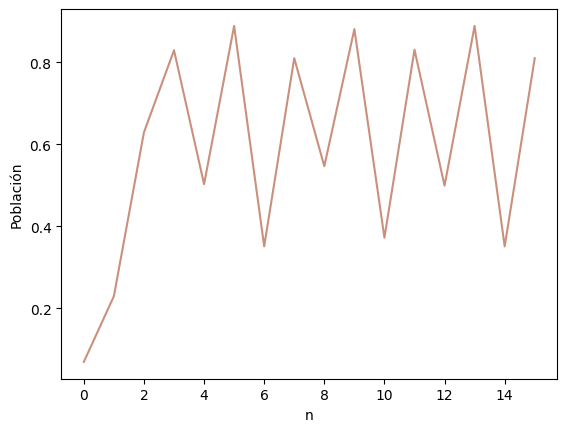

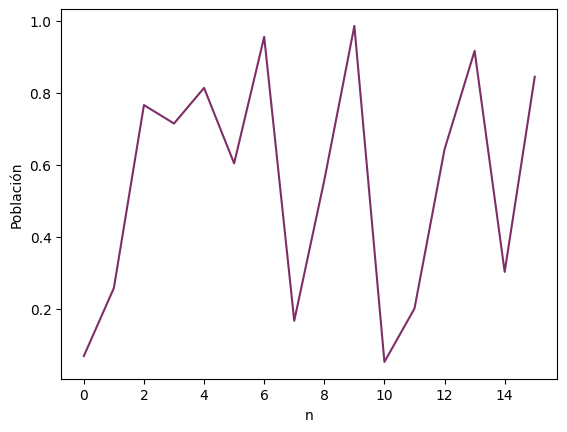

In [8]:
R=np.linspace(0,4,10)
colores=["#FFCDB2","#FFB4A2","#E5989B","#B5838D","#6D6875","#BCD2EE","#9B7EDE","#76E7CD","#CA907E","#7D2E68","#251351","A85751"]
contador=0
for r in R:
  grafica(r,xn,color=colores[contador])
  contador+=1

In [9]:
Np = 1000
xf = np.zeros(Np)
r  = np.linspace(2.5, 4, Np)

for i in range(0, Np):
  xini = np.random.random()
  x_i = logist_map(r = r[i], xn = xini, n = 1000)
  xf[i] = x_i


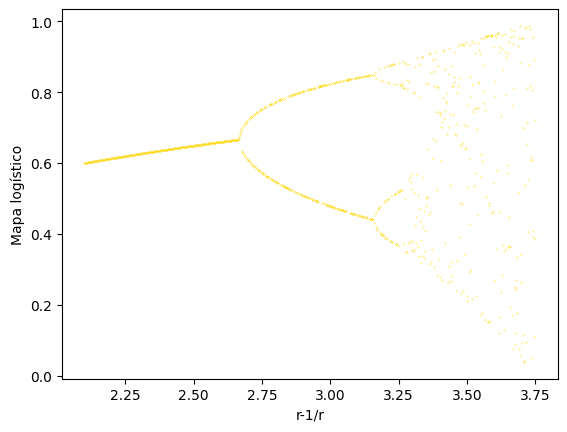

In [10]:
plt.plot((r-1/r), xf,  ".", markersize = 0.5,c="gold")
plt.xlabel("r-1/r")
plt.ylabel("Mapa logístico")
plt.show()

# **Mapa de henon**

In [11]:
a=1.4
b=0.3
xn=1

In [12]:
def henon_map(a,b,xn,n):
  yn=1
  for i in range(0,n):
    yn=b*xn
    xn=1-a*xn**2+yn
  return np.array([xn,yn])

In [13]:
N=np.arange(0,20,dtype=int)
coords=np.zeros((len(N),2))
for n in N:
  coords[n]=henon_map(a,b,xn,n)

In [14]:
coords[:,0]

array([ 1.        , -0.1       ,  0.956     ,  0.0072896 ,  1.00211249,
       -0.10528746,  0.95289413,  0.01465812,  1.00409663, -0.11026508,
        0.94989873,  0.02173897,  1.00586008, -0.11469826,  0.94717255,
        0.02816159,  1.00733817, -0.11842082,  0.94484087,  0.03363828])

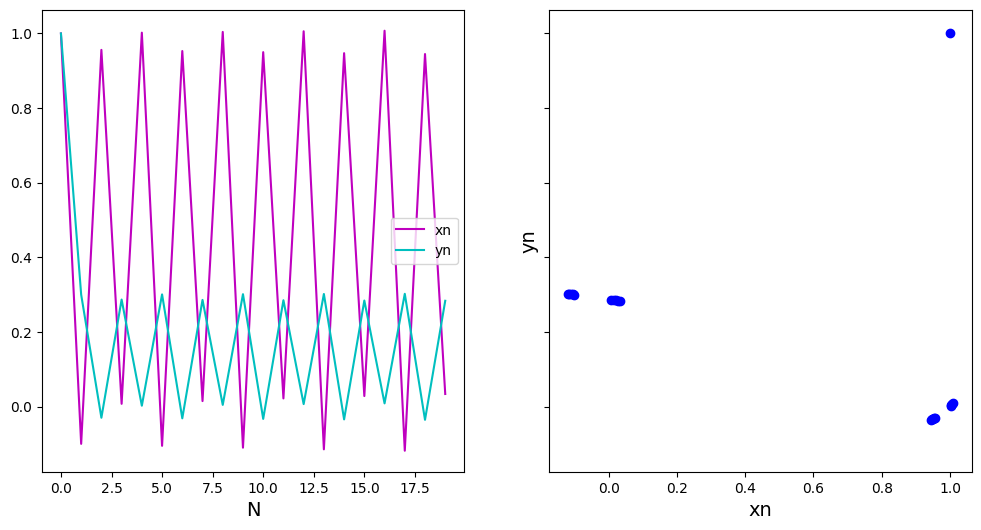

In [15]:

fig,axs=plt.subplots(1,2,sharey=True,figsize=[12,6])
axs[0].plot(N,coords[:, 0],c="m")
axs[0].plot(N,coords[:, 1],c="c")
axs[0].legend(["xn","yn"])
axs[0].set_xlabel("N",fontsize=14)
axs[1].plot(coords[:,0],coords[:,1],"o",c="blue")
axs[1].set_xlabel("xn",fontsize=14)
axs[1].set_ylabel("yn",fontsize=14)
plt.show()

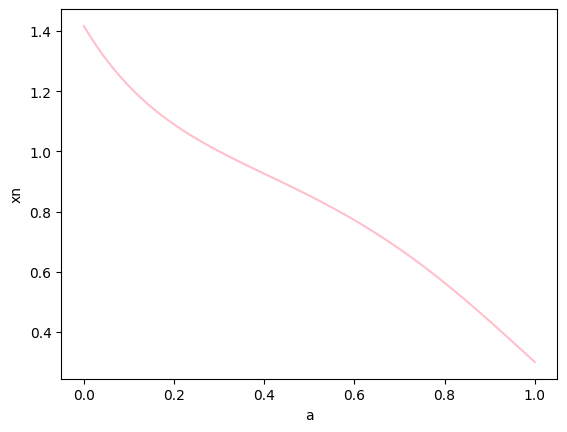

In [16]:
A=np.linspace(0,1,100)
coordsx=np.zeros(len(A))
b=0.3
contador=0
for a in A:
  henon=henon_map(a,b,xn,3)
  coordsx[contador]=henon[0]
  contador+=1
plt.figure()
plt.plot(A,coordsx,c="pink")
plt.xlabel("a")
plt.ylabel("xn")
plt.show()

# **Gradiente descendente**

In [17]:
import random

In [231]:
def gradiente(N,alpha,f,df):
  w=random.randint(0,10)
  wg=np.zeros(N)
  fg=np.zeros(N)
  contador = 0
  #para iniciar
  #la verdad no entendí porqué pero necesitaba un alpha
  #para que empiece siendo muy grande
  for i in range(N):
    w_i=w-(alpha*df(w))
    fg[contador]=f(w_i)
    wg[contador]=w_i
    w=w_i
    contador += 1
  index=np.argsort(wg)
  wg=wg[index]
  fg=fg[index]
  puntos=np.array([wg,fg])
  puntos=puntos.T
  return puntos
  #creo que no es muy práctico que sea un diccionario

In [131]:
#pruebas de como ordenar diccionarios
eli={1:2,4:0,3:9,8:5}
eli=np.array(sorted(eli.items(),key=lambda x:x[1]))
eli.T[0]

array([4, 1, 8, 3])

In [232]:
f= lambda x: x**2
#función
df= lambda x: 2*x
#derivada de la función
gradiente(10,0.1,f,df)

array([[ 0.85899346,  0.73786976],
       [ 1.07374182,  1.1529215 ],
       [ 1.34217728,  1.80143985],
       [ 1.6777216 ,  2.81474977],
       [ 2.097152  ,  4.39804651],
       [ 2.62144   ,  6.87194767],
       [ 3.2768    , 10.73741824],
       [ 4.096     , 16.777216  ],
       [ 5.12      , 26.2144    ],
       [ 6.4       , 40.96      ]])

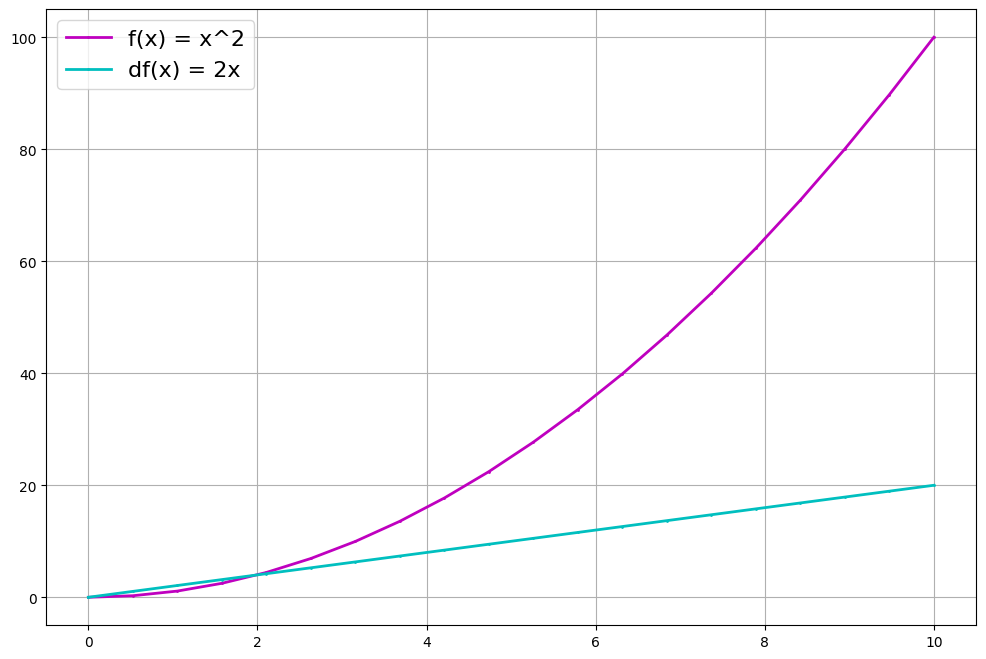

In [123]:
x=np.linspace(0,10,20)
plt.figure(figsize=(12, 8))
plt.plot(x,f(x),"m.-", markersize = 2.0, linewidth = 2.0, label="f(x) = x^2")
plt.plot(x,df(x),  "c.-", markersize = 2.0, linewidth = 2.0, label="df(x) = 2x")
plt.legend(fontsize=16)
plt.grid()
plt.show()

In [244]:
#tengo algo mal con la funcion porque solo me regresa 2 valores aunque le ponga un valor enorme de N
def grafica_grad(N,alpha1,alpha2,f,df):
  X1=gradiente(N,alpha1,f,df).T[0]
  Y1=gradiente(N,alpha1,f,df).T[1]
  X2=gradiente(N,alpha2,f,df).T[0]
  Y2=gradiente(N,alpha2,f,df).T[1]
  fig,axs=plt.subplots(1,2,sharey=True,figsize=[12,6])
  fig.suptitle("N="+str(N))
  #axs.set_title(str(N))
  axs[0].plot(X1,Y1,c="pink")
  #axs[0].suptitle("x")
  axs[0].set_ylabel("f(x)")
  axs[0].set_title("alpha=0.1")
  axs[1].plot(X2,Y2,c="m")
  axs[1].set_title("alpha=0.01")
  plt.show()

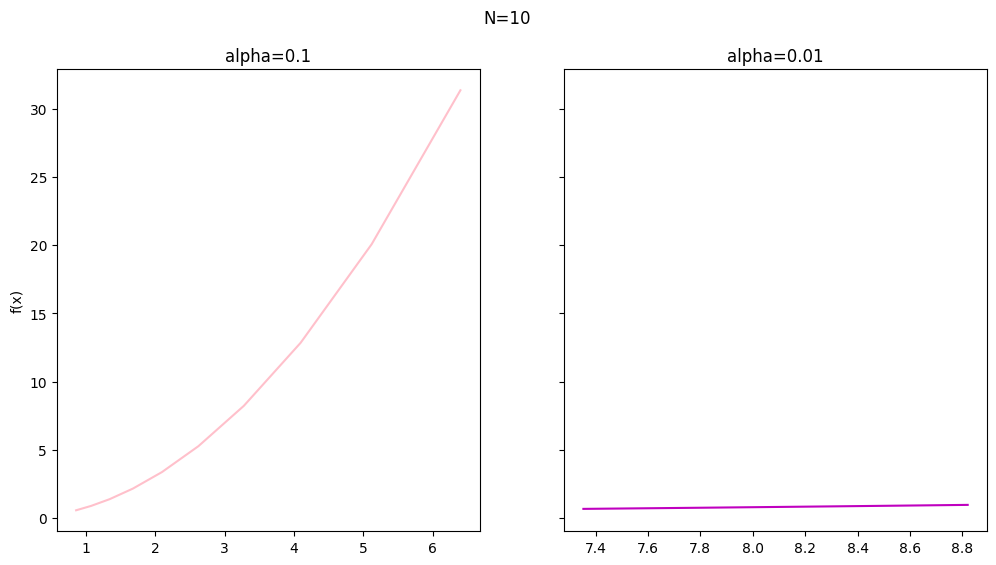

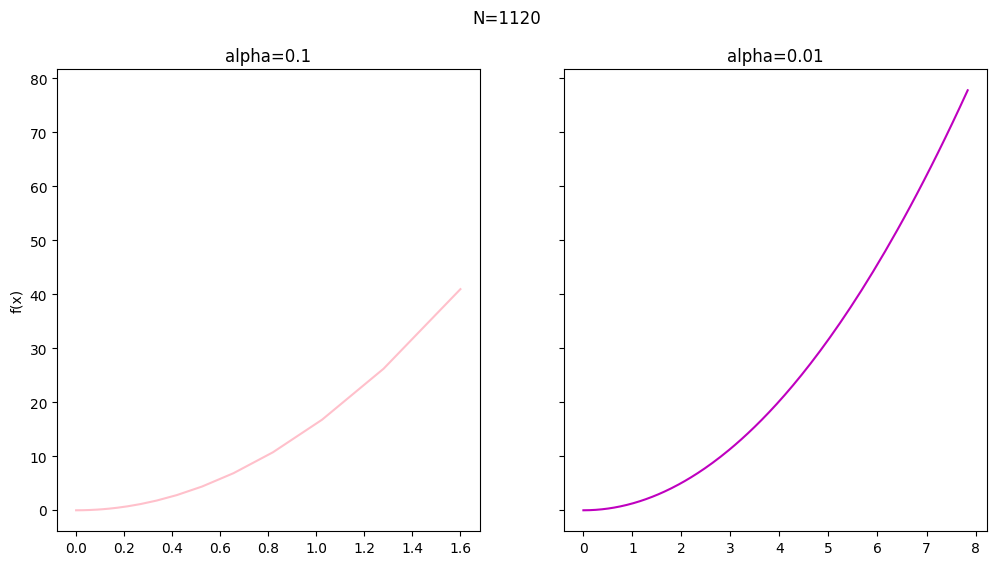

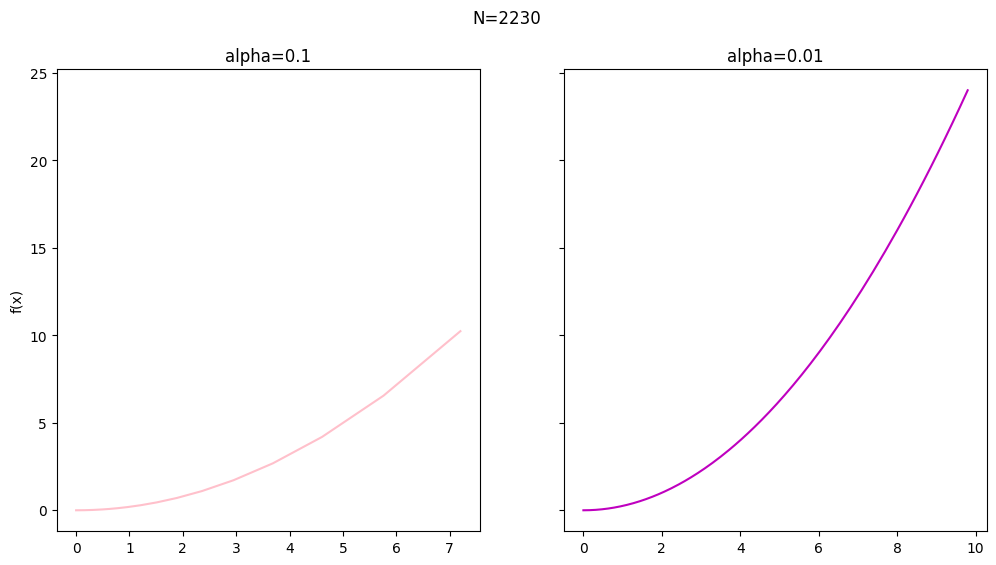

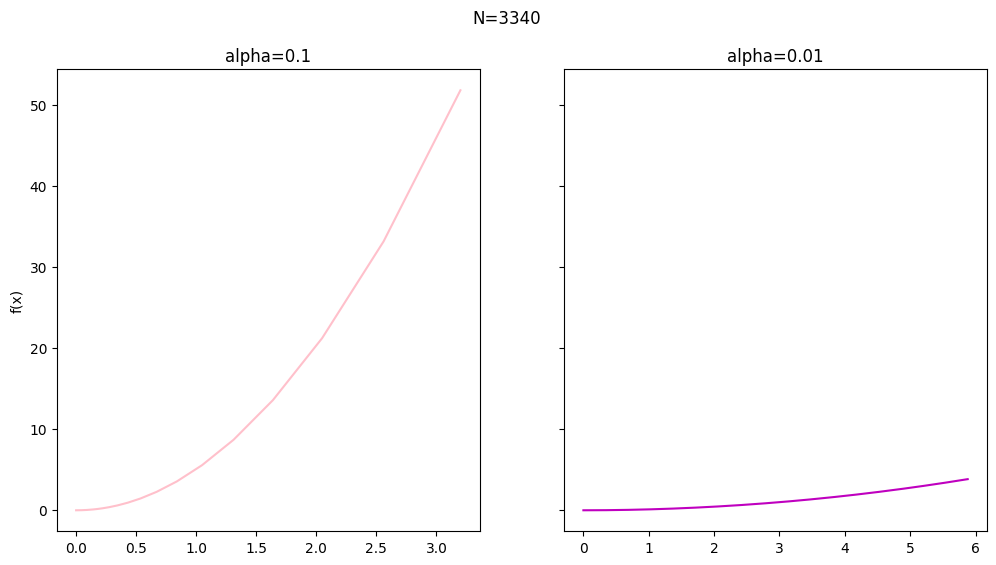

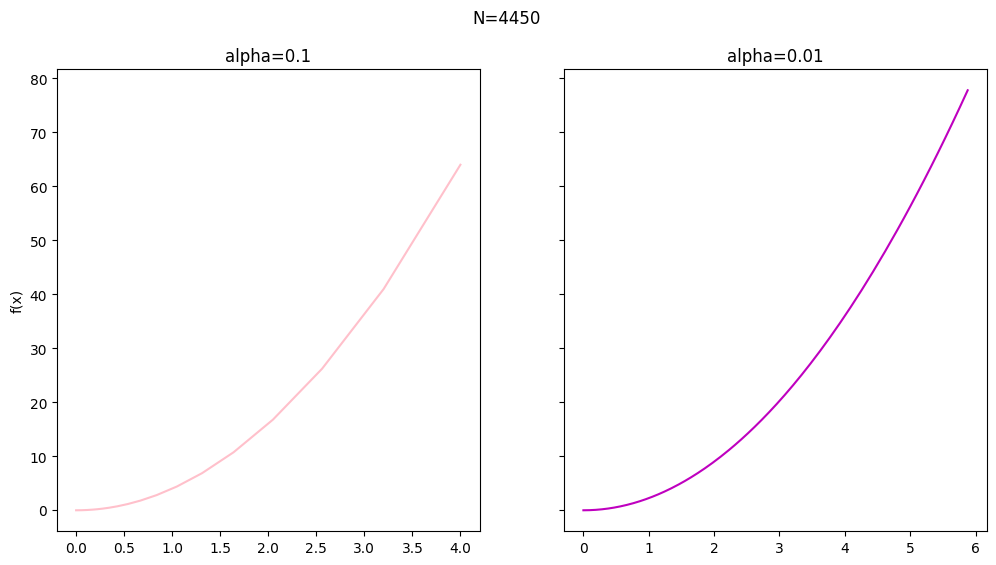

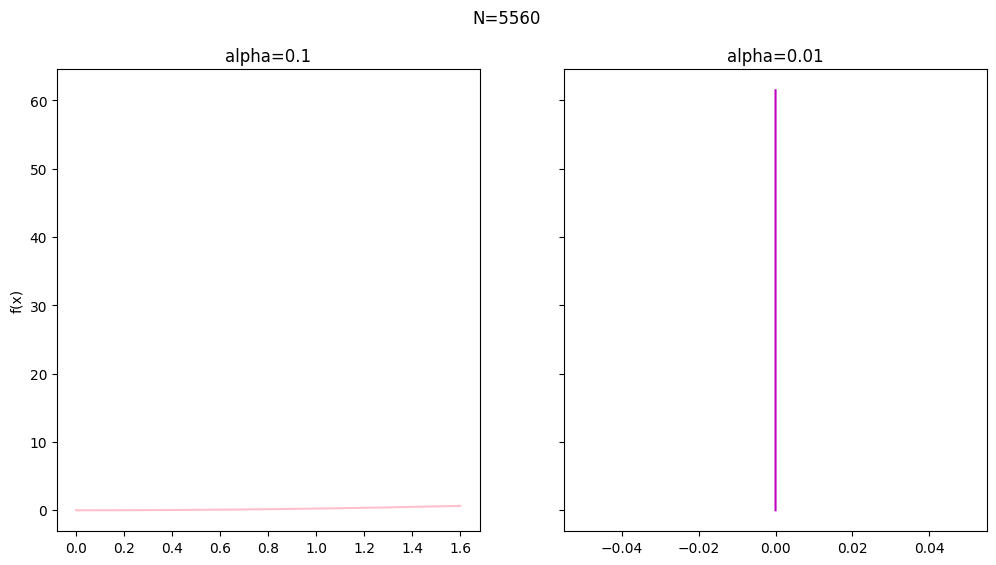

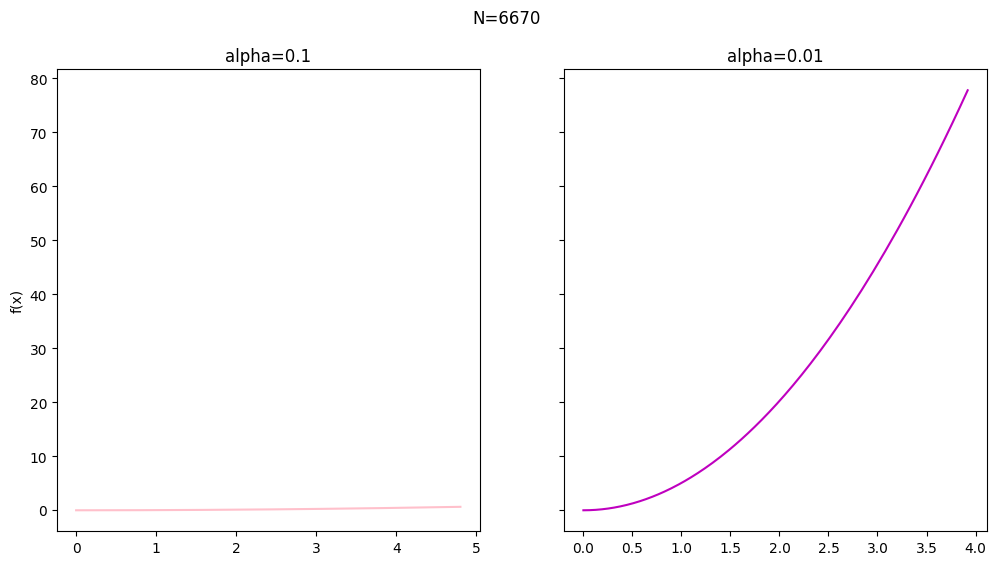

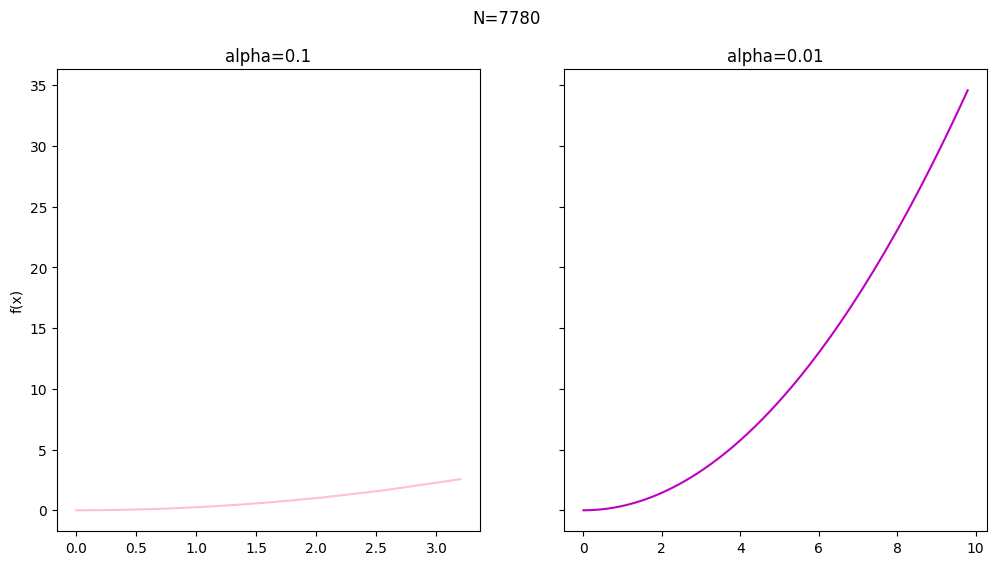

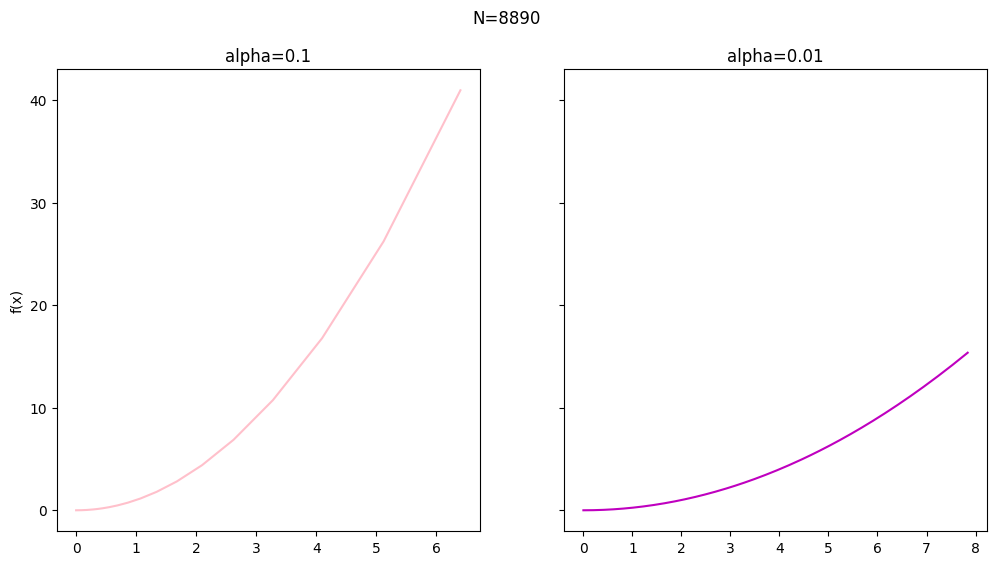

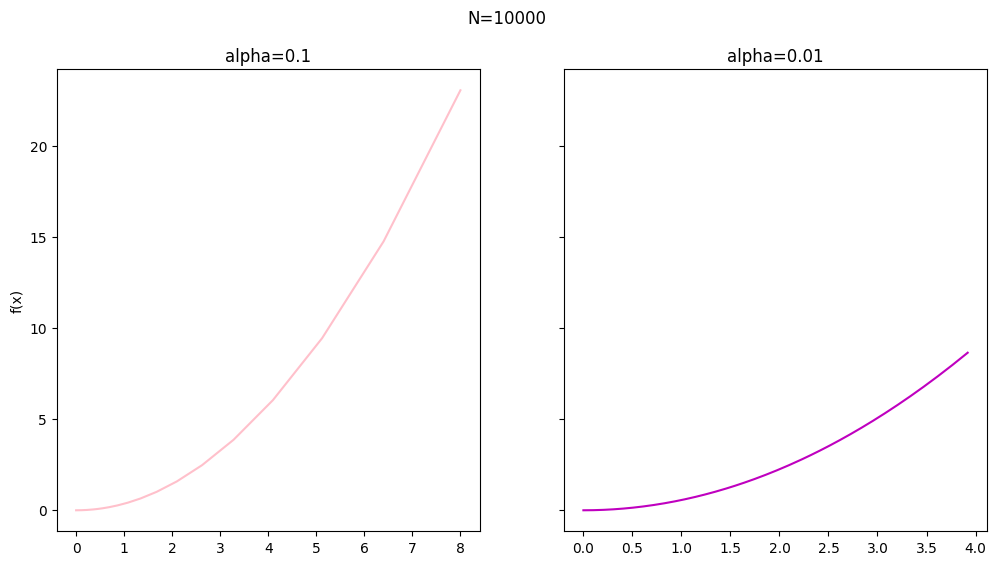

In [245]:
N=np.linspace(10,10000,10,dtype=int)
alpha1=0.1
alpha2=0.01
for n in N:
  grafica_grad(n,alpha1,alpha2,f,df)